In [35]:
import numpy as np

def func(x):  # Function for statistical uncertainty estimation
    return 4 - 3 * x - 2 * x**2 + 3 * x**3
    
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = func(x_valid)  # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(func(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(func(x_valid), sigma)

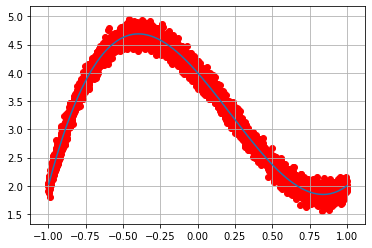

In [5]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_train, y_train, color='r')
plt.grid(True); plt.show()

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(1,),  activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(40,   activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(55,  activation='relu'))
model.add(Dense(1, activation='softplus' ))

#model.add(Dense(20, input_shape=(1,),  activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(1, activation='softplus' ))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])
#stocastic gradient descent, mean square error

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 35)                1435      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1440      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_8 (Dense)              (None, 55)                2255      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 56        
Total params: 6,906
Trainable params: 6,906
Non-trainable params: 0
____________________________________________________

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/500
157/157 [==============================] - 0s 1ms/step - loss: 5.6740 - mse: 5.6740 - val_loss: 2.9023 - val_mse: 2.9023
Epoch 2/500
157/157 [==============================] - 0s 722us/step - loss: 1.8261 - mse: 1.8261 - val_loss: 1.2954 - val_mse: 1.2954
Epoch 3/500
157/157 [==============================] - 0s 755us/step - loss: 1.0680 - mse: 1.0680 - val_loss: 0.9030 - val_mse: 0.9030
Epoch 4/500
157/157 [==============================] - 0s 843us/step - loss: 0.7456 - mse: 0.7456 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 5/500
157/157 [==============================] - 0s 782us/step - loss: 0.5315 - mse: 0.5315 - val_loss: 0.4666 - val_mse: 0.4666
Epoch 6/500
157/157 [==============================] - 0s 824us/step - loss: 0.3867 - mse: 0.3867 - val_loss: 0.3462 - val_mse: 0.3462
Epoch 7/500
157/157 [==============================] - 0s 897us/step - loss: 0.2896 - mse: 0.2896 - val_loss: 0.2666 - val_mse: 0.2666
Epoch 8/500
157/157 [==============================] - 0s

157/157 [==============================] - 0s 780us/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 62/500
157/157 [==============================] - 0s 782us/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 63/500
157/157 [==============================] - 0s 739us/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 64/500
157/157 [==============================] - 0s 729us/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 65/500
157/157 [==============================] - 0s 727us/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 66/500
157/157 [==============================] - 0s 748us/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 67/500
157/157 [==============================] - 0s 771us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 68/500
157/157 [==============================] - 0s 71

157/157 [==============================] - 0s 759us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 122/500
157/157 [==============================] - 0s 749us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 123/500
157/157 [==============================] - 0s 733us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 124/500
157/157 [==============================] - 0s 743us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 125/500
157/157 [==============================] - 0s 766us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 126/500
157/157 [==============================] - 0s 724us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 127/500
157/157 [==============================] - 0s 754us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 128/500
157/157 [==============================] 

157/157 [==============================] - 0s 3ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 182/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 183/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 184/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 185/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 186/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 187/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 188/500
157/157 [==============================] - 0s 3ms/step 

Epoch 242/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 243/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 244/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 245/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 246/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 247/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 248/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 249/500
157/157 [==============================] 

157/157 [==============================] - 1s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 303/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 304/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 305/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 306/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 307/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 308/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 309/500
157/157 [==============================] - 1s 3ms/step 

Epoch 363/500
157/157 [==============================] - 1s 4ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 364/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 365/500
157/157 [==============================] - 1s 4ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 366/500
157/157 [==============================] - 1s 4ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 367/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 368/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 369/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 370/500
157/157 [==============================] 

157/157 [==============================] - 1s 4ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 424/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 425/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 426/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 427/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 428/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 429/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 430/500
157/157 [==============================] - 0s 3ms/step 

Epoch 484/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 485/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 486/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 487/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 488/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 489/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 490/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 491/500
157/157 [==============================] 

In [9]:
# return weights
#model.get_weights()

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 733us/step - loss: 0.0101 - mse: 0.0101

Test loss: 0.010148449800908566
Test accuracy: 0.010148449800908566


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 737us/step - loss: 5.6569e-04 - mse: 5.6569e-04

Test loss: 0.0005656949360854924
Test accuracy: 0.0005656949360854924


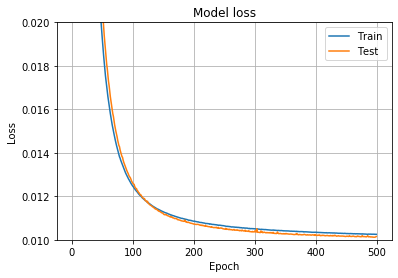

In [22]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.ylim([0.01,0.02])
#plt.savefig('./Pictures_neuron_var/loss_6NN.png', dpi=300)
plt.legend(['Train', 'Test'], loc='best')
plt.show()

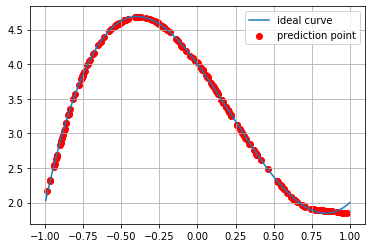

In [36]:
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
#plt.title('Fitting: epoch=200, ntrain=5000, sigma=0.1')
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.legend(['ideal curve' , 'prediction point'], loc='best')
plt.grid(True)
#plt.savefig('./Pictures_Optymizer_var/13NN.png', dpi=300)
plt.show()

# Risultati al variare del layer
## Parametri: N_train= 5000, sigma = 0.1, numero di Neuroni totale 61
Per tutte le reti di questo paragrafo: 
- Ottimizzazione: sgd  
- loss: mse
### Rete neurale #1
4 layers:
"numero di neuroni" - "funzione di attivazione"
- 10 - 'relu'
- 15 - 'relu'
- 35 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_layer_var/1NN.png" alt="Drawing" style="width: 500px;"/>
 Nei tratti lineari le predizioni risultano abbastanza corrette, mentre nelle vicinanze di massimo e minimo, ci sono problemi. Nella parte di massimo i punti sottostimano leggermente il valore della curva mentre al minimo i punti predetti sono costanti. 
<img src="./Pictures_layer_var/loss_1NN.png" alt="Drawing" style="width: 500px;"/>
La Train Loss diventa costante per un valore di circa 0.010.


### Rete neurale #2
3 layers:
"numero di neuroni" - "funzione di attivazione"
- 15 - 'relu'
- 45 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_layer_var/2NN.png" alt="Drawing" style="width: 500px;"/>
 Nei tratti lineari le predizioni risultano abbastanza corrette, mentre nelle vicinanze di massimo e minimo, ci sono problemi. Nella parte di massimo i punti sovrastimano leggermente il valore della curva mentre al minimo i punti predetti sono costanti.  
<img src="./Pictures_layer_var/loss_2NN.png" alt="Drawing" style="width: 500px;"/>
La Train Loss diventa costante per un valore di 0.010

### Rete neurale #3
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 10 - 'relu'
- 5 - 'relu'
- 10 - 'relu'
- 10 - 'relu'
- 25 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_layer_var/3NN.png" alt="Drawing" style="width: 500px;"/>
Nei tratti lineari c'è sempre una buona attendibilità, il fit nel massimo diventa più smooth rispetto a prima e al minimo la predizione non è più costante ma c'è una piccola risalita.
<img src="./Pictures_layer_var/loss_3NN.png" alt="Drawing" style="width: 500px;"/>
La Train Loss diventa costante per un valore di circa 0.010


# Risultati al variare del numero di neuroni per ogni layer
## Parametri: N_train= 5000, sigma = 0.1
### Rete neurale 4
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 20 - 'relu'
- 15 - 'relu'
- 20 - 'relu'
- 20 - 'relu'
- 35 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_neuron_var/4NN.png" alt="Drawing" style="width: 500px;"/>
In corrispondenza del massimo, i punti sovrastimano la curva, anche se la forma sembra smooth, non ci sono spigoli. Nella zona del minimo, c'è ancora il tratto costante.
<img src="./Pictures_neuron_var/loss_4NN.png" alt="Drawing" style="width: 500px;"/>
La Train Loss diventa costante per un valore di circa 0.010

### Rete neurale 5
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 30 - 'relu'
- 25 - 'relu'
- 30 - 'relu'
- 30 - 'relu'
- 45 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_neuron_var/5NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_neuron_var/loss_5NN.png" alt="Drawing" style="width: 500px;"/>

### Rete neurale 6
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 40 - 'relu'
- 35 - 'relu'
- 40 - 'relu'
- 40 - 'relu'
- 55 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_neuron_var/6NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_neuron_var/loss_6NN.png" alt="Drawing" style="width: 500px;"/>

### Rete neurale 7
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 50 - 'relu'
- 45 - 'relu'
- 50 - 'relu'
- 50 - 'relu'
- 65 - 'relu'
- 1 - 'softplus'

<img src="./Pictures_neuron_var/7NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_neuron_var/loss_7NN.png" alt="Drawing" style="width: 500px;"/>



# Reti Neurali con diverse funzioni di attivazione
### Rete neurale 8
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 10 - 'relu'
- 5 - 'relu'
- 10 - 'relu'
- 10 - 'selu'
- 25 - 'selu'
- 1 - 'softplus'
<img src="./Pictures_ActFunc_var/8NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_ActFunc_var/loss_8NN.png" alt="Drawing" style="width: 500px;"/>


### Rete neurale 9
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 20 - 'relu'
- 15 - 'relu'
- 20 - 'relu'
- 20 - 'selu'
- 25 - 'selu'
- 1 - 'softplus'
<img src="./Pictures_ActFunc_var/9NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_ActFunc_var/loss_9NN.png" alt="Drawing" style="width: 500px;"/>

### Rete neurale 10
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 40 - 'relu'
- 35 - 'relu'
- 40 - 'relu'
- 40 - 'selu'
- 45 - 'selu'
- 1 - 'softplus'
<img src="./Pictures_ActFunc_var/10NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_ActFunc_var/loss_10NN.png" alt="Drawing" style="width: 500px;"/>

### Rete neurale 11
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 20 - 'relu'
- 15 - 'relu'
- 20 - 'relu'
- 20 - 'elu'
- 25 - 'elu'
- 1 - 'softplus'
<img src="./Pictures_ActFunc_var/11NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_ActFunc_var/loss_11NN.png" alt="Drawing" style="width: 500px;"/>

# Reti Neurali con diversa ottimizzazione
### Rete neurale 12
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 20 - 'relu'
- 15 - 'relu'
- 20 - 'relu'
- 20 - 'elu'
- 25 - 'elu'
- 1 - 'softplus'  
Ottimizzazione = "Adagram"
<img src="./Pictures_Optymizer_var/12NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_Optymizer_var/loss_12NN.png" alt="Drawing" style="width: 500px;"/>

# Reti Neurali con diversa loss function
### Rete neurale 12
6 layers:
"numero di neuroni" - "funzione di attivazione"
- 20 - 'relu'
- 15 - 'relu'
- 20 - 'relu'
- 20 - 'elu'
- 25 - 'elu'
- 1 - 'softplus'  
Ottimizzazione = "sgd"
Loss Fucntion = "mae"
<img src="./Pictures_loss_var/13NN.png" alt="Drawing" style="width: 500px;"/>
<img src="./Pictures_loss_var/loss_13NN.png" alt="Drawing" style="width: 500px;"/>

# Prediction out of range: Rete neurale 6
<img src="./Pictures_neuron_var/6NN_outrange.png" alt="Drawing" style="width: 500px;"/>
I punti fuori dal range su cui c'era stato il training del modello non predicono bene i risultati.

# Conclusioni
Da questi grafici e da queste reti neurali, ho notato immediatamente la difficoltà di fittare le zone nei pressi dei massimi e minimi, a differenza dei tratti approssimativamente lineari che erano più facili da fittare. 

In particolare, in modo da fittare al meglio il minimo sono stati fatti diversi tentativi, per esempio fissati numero di dati di train, numero di layer,funzione di attivazione e loss sono stati aumentati di dieci i neuroni a ogni layer. 
E' possibile vedere un miglioramento del fit aumentando la complessità, anche se dopo un po' sembra non migliorare più. (Probabilmente aumentando si andrebbe nel caso di overfitting, come spiegato nelle slide)

Risultati migliori sono stati ottenuti cambiando la funzione di attivazione, per esempio con la rete neurale numero 10 dove è stato ottenuto il miglior fit del minimo.  In conclusione, invece di aumentare sempre più la complessità è più importante concentrarsi sulla giusta combinazione degli elementi che formano la rete neurale.